In [88]:
import warnings
from timy.settings import timy_config

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
timy_config.tracking = False

In [89]:
from dtextract.data.data import ID, NUM, CAT_RES

output = 'logs/youtube_shakira.txt'  # The log file in which the log of running code will be written
path = '../data/youtube_shakira.csv'  # Path to the input dataset in csv format
data_types = [ID] * 2 + [NUM] * 49 + [CAT_RES]
has_header = True
isClassify = True 
class_names = {'neg': 0, 'pos': 1}


In [90]:
# decision tree extraction parameters
nComponents = 50  # Number of components (the gaussian mixtures)
maxSize = 64  # maximum tree size
nPts = 1000  # Number of points used in active sampling
nTestPts = 500  # Number of test points used in Active sampling
maxDtSize = maxSize  # decision tree training parameters
tgtScore = None
minGain = 1e-4

# random forest parameters
nTrees = 100 

# training data proportion
trainingProp = 0.7


In [91]:
from dtextract.util.log import *
from dtextract.data.data import readCsv

setCurOutput(output)
log('Parsing CSV...', INFO)
(df, res, resMap, catFeats, columnNames) = readCsv(path, has_header, data_types)
log('Done!', INFO)


Parsing CSV...
Reading file: ../data/youtube_shakira.csv
Done!
Rows read: 370
Columns: 50
Column names:
0: 39
1: 500
2: adf
3: amp
4: beautiful
5: best
6: br
7: channel
8: check
9: com
10: comment
11: covers
12: google
13: guys
14: hey
15: hi
16: href
17: just
18: kld3y
19: know
20: life
21: like
22: love
23: ly
24: make
25: mixtape
26: money
27: new
28: playlist
29: quot
30: really
31: shakira
32: share
33: song
34: songs
35: stop
36: subscribe
37: subscribed
38: thank
39: thanks
40: thumbs
41: video
42: visit
43: waka
44: watch
45: website
46: wil
47: wow
48: youtube
49: Label

Done!


In [92]:
from dtextract.data.data import split
log('Splitting into training and test...', INFO)
(trainDf, testDf) = split(df, trainingProp)
log('Done!', INFO)


Splitting into training and test...
Done!


In [93]:
from dtextract.data.data import constructDataMatrix
log('Constructing data matrices...', INFO)
(XTrain, yTrain, catFeatIndsTrain, numericFeatIndsTrain) = constructDataMatrix(trainDf, res, catFeats)
(XTest, yTest, catFeatIndsTest, numericFeatIndsTest) = constructDataMatrix(testDf, res, catFeats)
log('Done!', INFO)



Constructing data matrices...
Done!


In [94]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

log('Training random forest...', INFO)
rfConstructor = RandomForestClassifier if isClassify else RandomForestRegressor
rf = rfConstructor(n_estimators=nTrees)
rf.fit(XTrain, yTrain)
log('Done!', INFO)



Training random forest...
Done!


In [95]:
from dtextract.util.util import f1Vec, mseVec

rfScoreFunc = f1Vec if isClassify else mseVec
rfTrainScore = rfScoreFunc(rf.predict, XTrain, yTrain)
rfTestScore = rfScoreFunc(rf.predict, XTest, yTest)
log('Training score: ' + str(rfTrainScore), INFO)
log('Test score: ' + str(rfTestScore), INFO)


Training score: 0.9791666666666666
Test score: 0.9295774647887324


In [96]:
from dtextract.core.learn import ParamsLearn
from dtextract.impl.simp import ParamsSimp
from dtextract.impl.funcs import getRfFunc

# Step 2: Set up decision tree extraction inputs
paramsLearn = ParamsLearn(tgtScore, minGain, maxSize)
paramsSimp = ParamsSimp(nPts, nTestPts, isClassify)

# Step 3: Function
rfFunc = getRfFunc(rf)


In [97]:
from dtextract.impl.dists import CategoricalGaussianMixtureDist as CGMD
dist = CGMD(XTrain, catFeatIndsTrain, numericFeatIndsTrain, nComponents)


Fitting Gaussian mixture with 50 components...
Done!


In [98]:
from dtextract.impl.simp import learnDTSimp, genAxisAligned

# Step 5: Extract decision tree
dtExtract, dtMap = learnDTSimp(genAxisAligned, rfFunc, dist, paramsLearn, paramsSimp)


Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 1.0000000000000049
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.7260000000000035
Computed leaf score: 0.5540000000000027
Putting gain: 0.17200000000000082
Internal node index: 0
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.8192671383001544
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.679172457650828
Computed leaf score: 0.5407163112781019
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.18073286169985037
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal s

Current mass: 0.003197886957222726
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.0022577081917992447
Computed leaf score: 0.00226410396571369
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.007927660997466064
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.006754367169841086
Computed leaf score: 0.006754367169841086
Current gain: 0.0014240701382001652
Current score: 1.0042102139111493
Current size: 23
Internal node index: 2
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.0004998838830655436
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.0004239015328395809
Computed leaf score: 0.0003519182536781426
Sampling 1000 points
Do

Trained proposed decision tree:
Node count: 31


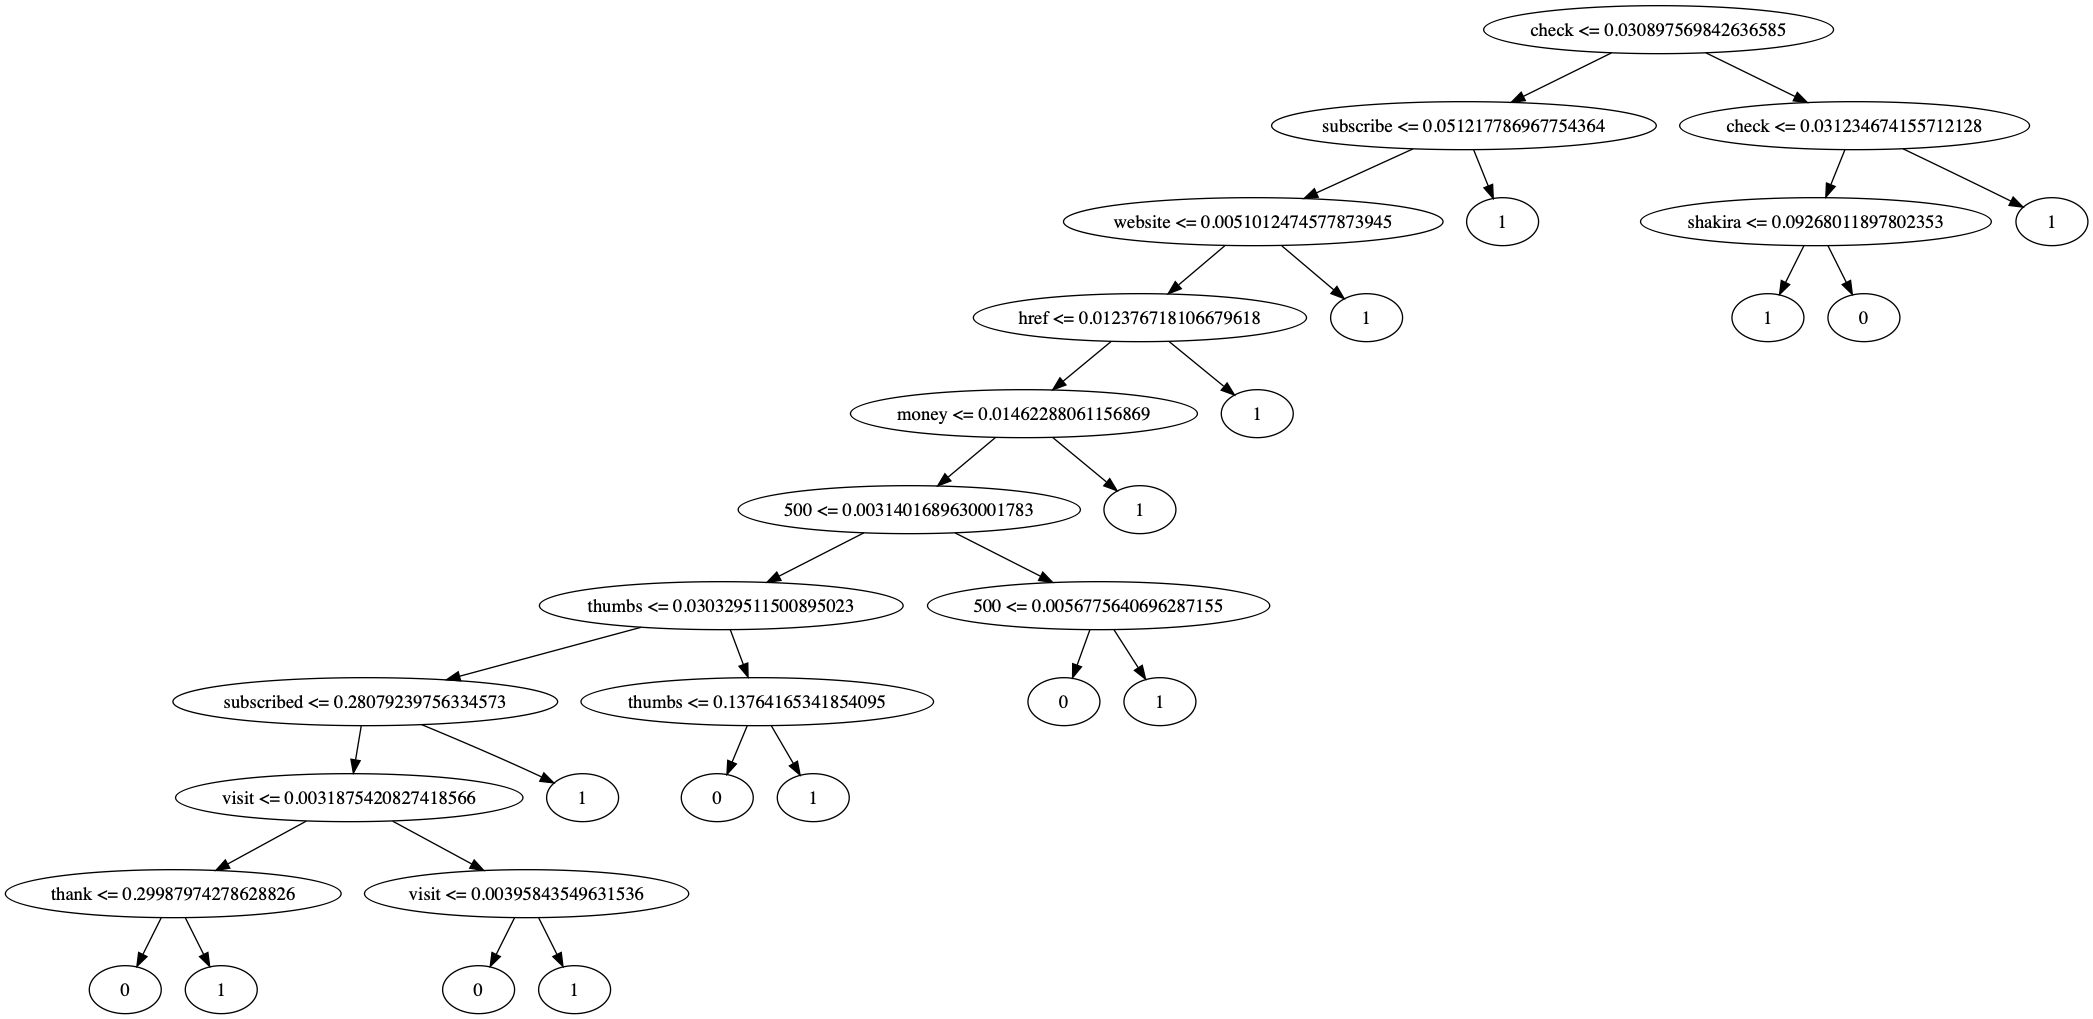

In [99]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
log('Trained proposed decision tree:', INFO)
log('Node count: ' + str(dtExtract.nNodes()), INFO)

graphviz_data = dtExtract.toDotGraph(hasHeader=has_header, columnNames=columnNames)
graph = pydotplus.graph_from_dot_data(graphviz_data)
Image(graph.create_png())


In [100]:
from dtextract.util.util import f1, mse

scoreFunc = f1 if isClassify else mse

dtExtractRelTrainScore = scoreFunc(dtExtract.eval, XTrain, rf.predict(XTrain))
dtExtractRelTestScore = scoreFunc(dtExtract.eval, XTest, rf.predict(XTest))

log('Relative training score: ' + str(dtExtractRelTrainScore), INFO)
log('Relative test score: ' + str(dtExtractRelTestScore), INFO)

dtExtractTrainScore = scoreFunc(dtExtract.eval, XTrain, yTrain)
dtExtractTestScore = scoreFunc(dtExtract.eval, XTest, yTest)

log('Training score: ' + str(dtExtractTrainScore), INFO)
log('Test score: ' + str(dtExtractTestScore), INFO)


Relative training score: 0.9555555555555556
Relative test score: 0.9767441860465117
Training score: 0.9347826086956522
Test score: 0.9064748201438849


In [101]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Step 6: Train a (greedy) decision tree
log('Training greedy decision tree', INFO)
maxLeaves = (maxDtSize + 1)//2
dtConstructor = DecisionTreeClassifier if isClassify else DecisionTreeRegressor
dtTrain = dtConstructor(max_leaf_nodes=maxLeaves)
dtTrain.fit(XTrain, rfFunc(XTrain))
log('Done!', INFO)
log('Node count: ' + str(dtTrain.tree_.node_count), INFO)


Training greedy decision tree
Done!
Node count: 29


In [102]:
dtTrainRelTrainScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTrain, rf.predict(XTrain))
dtTrainRelTestScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTest, rf.predict(XTest))

log('Relative training score: ' + str(dtTrainRelTrainScore), INFO)
log('Relative test score: ' + str(dtTrainRelTestScore), INFO)


Relative training score: 1.0
Relative test score: 0.9850746268656716


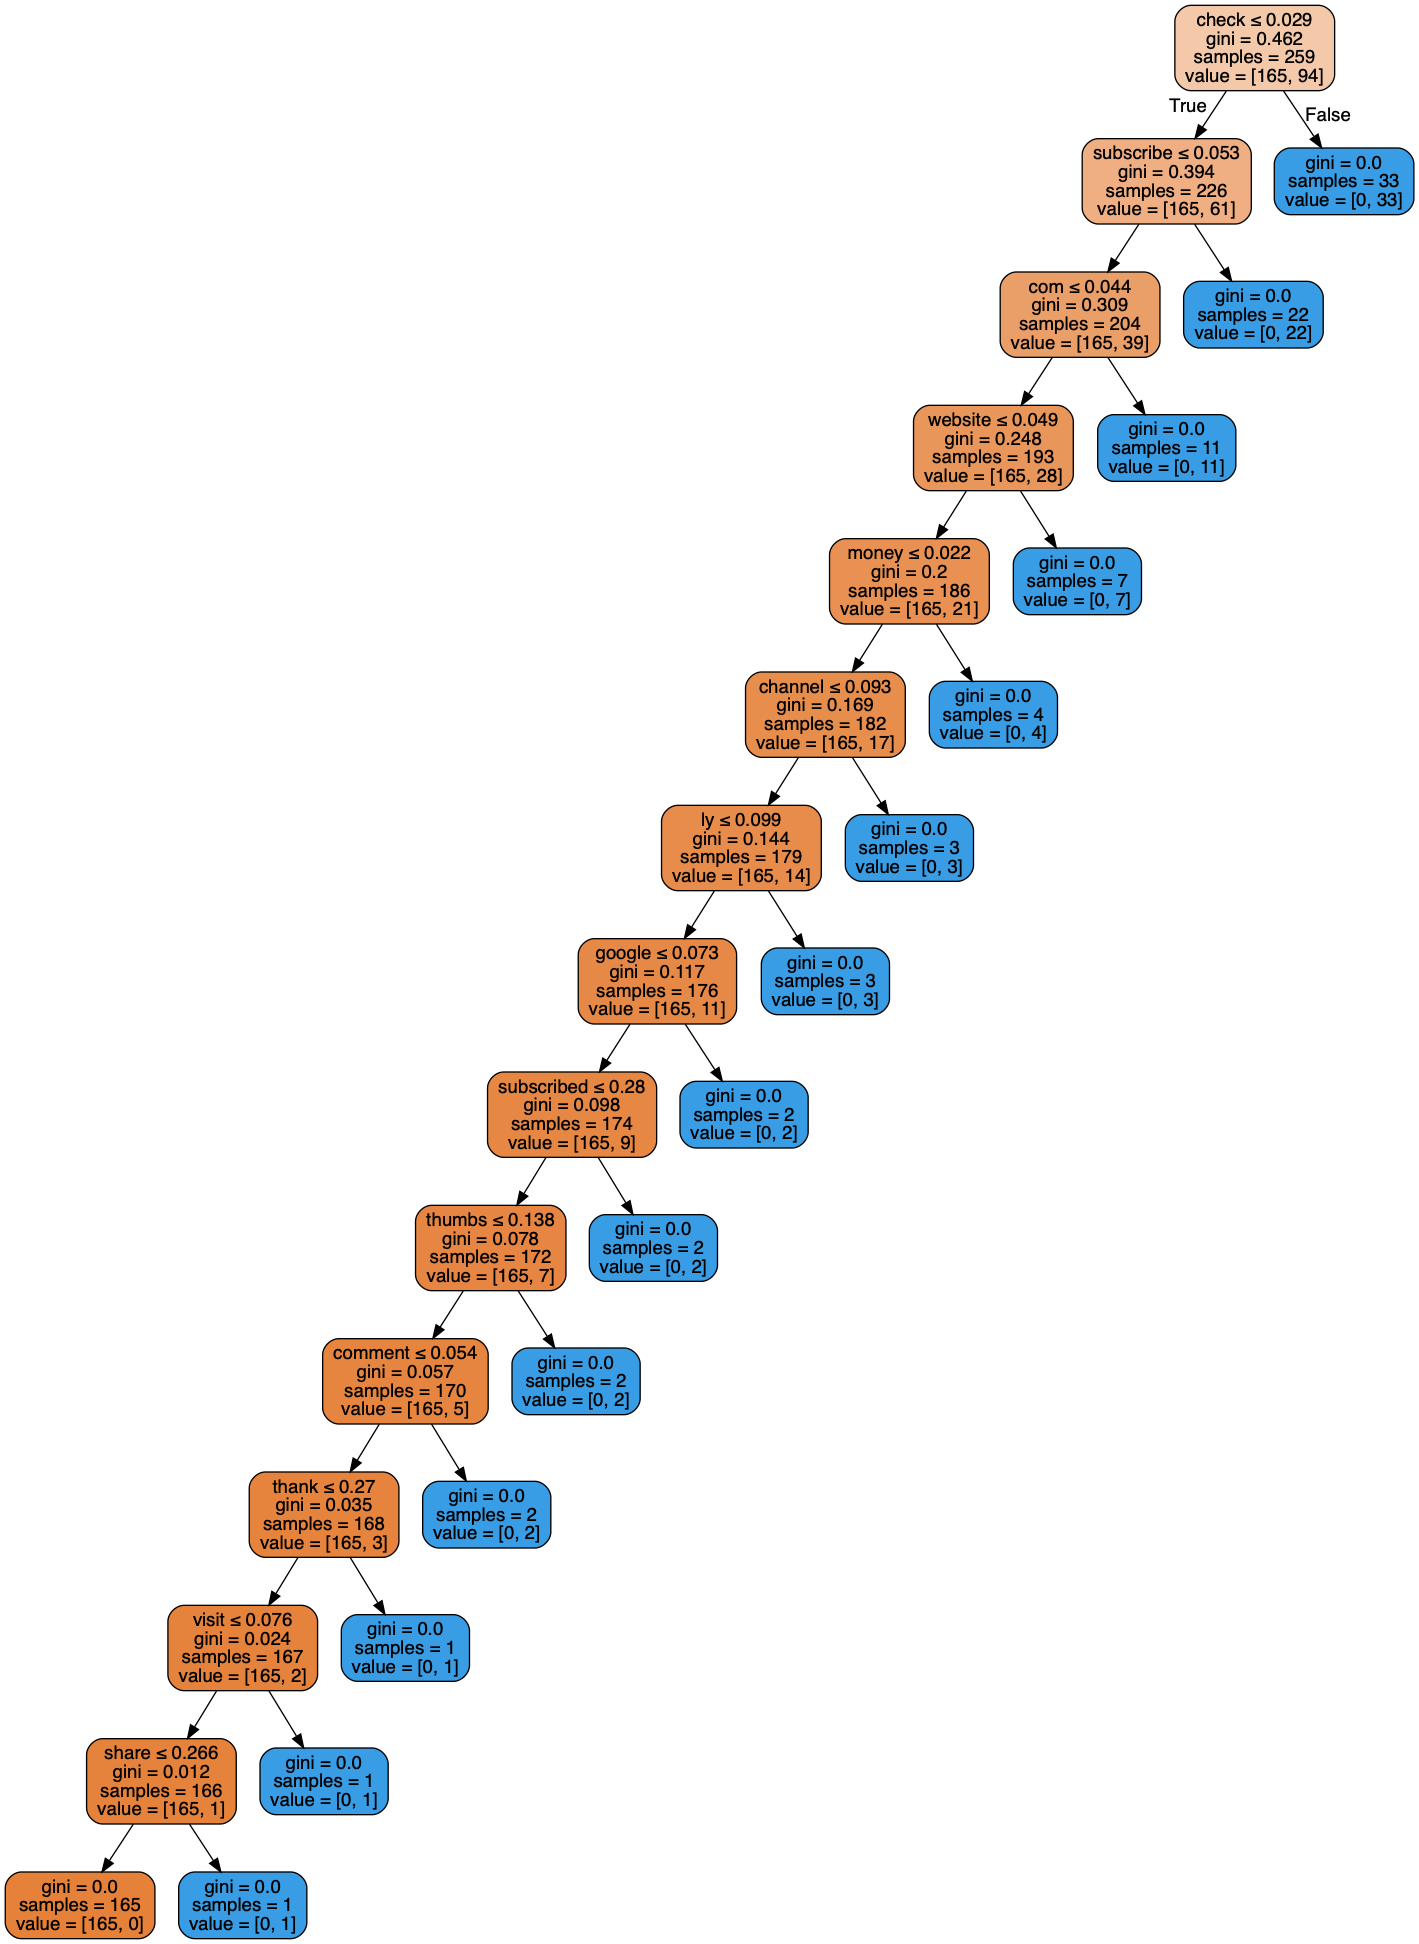

In [103]:
from sklearn.externals.six import StringIO  

dot_data = StringIO()
export_graphviz(dtTrain, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=columnNames[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [104]:
dtTrainTrainScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTrain, yTrain)
dtTrainTestScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTest, yTest)
    
log('Training score: ' + str(dtTrainTrainScore), INFO)
log('Test score: ' + str(dtTrainTestScore), INFO)


Training score: 0.9791666666666666
Test score: 0.9444444444444444


In [105]:
from dtextract.interpreter.dt_interpreter import *

predictions, biases, contributions = interpret_tree(dtExtract, dtMap, XTest, yTest)
assert_interpretation(predictions, biases, contributions)
    

Classes count is 2
Biases:
[[0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468]
 [0.31531532 0.68468468

In [106]:
descriptions = ''
if has_header:
    # NOTE: here you should trim the headers array to be the array of names of input columns 
    # with the same size as the number of columns. for example if the first row is and id row 
    # and the last row is the label row, you can use: 
    headers = np.array(columnNames.tolist())
    exps = interpret_samples(rf, dtExtract, XTest, contributions, labels=headers)
    for i in range(len(exps)):
        descriptions += exps[i].get_description(5, True, headers)
else:
    exps = interpret_samples(rf, dtExtract, XTest, contributions)
    for i in range(len(exps)):
        descriptions += exps[i].get_description(5)
        

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
from importlib import reload
from dtextract.interpreter.visualize import text_visualizer as tv
reload(tv)
tv.init_notebook_visualization()

classes = {0: 'Negative', 1: 'Positive'}

ind = 0
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

In [ ]:
ind = 10
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

In [ ]:
ind = 24
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

In [ ]:
ind = 101
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

In [ ]:
ind = 102
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

In [ ]:
ind = 103
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

In [ ]:
ind = 104
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)